In [33]:

dataset = [-7.88, 13.03, 42.6, 18.23, 8.27, 14.53, 50.86, 15.14, 14.72, 21.58, 7.41, 
        -8.66, 8.51, 5.02, 12.21, 5.28, 32.09, 4.86, 9.82, 17.74, 1.15, 24.2, 
        14.87, 9.69, 3.08, 13.3, 10.08, 7.38, 13.83, 22.82, 11.88, 14.24, 9.95, 
        -5.89, 22.7, 9.98, 12.26, 2.22, 10.78, 1.17, 24.55, 6.54, 15.97, -4.68, 15.98, -5.72, -12.42, -6.43, 10.12, -3.91]

sort = sorted(dataset)
print("Вариационный ряд (сортировка):\n", sort)


ran = max(dataset) - min(dataset)
print("Размах выборки: max - min =", ran)
print('Статистический ряд')
print([dataset.count(i) / len(dataset) for i in list(set(dataset))])


Вариационный ряд (сортировка):
 [-12.42, -8.66, -7.88, -6.43, -5.89, -5.72, -4.68, -3.91, 1.15, 1.17, 2.22, 3.08, 4.86, 5.02, 5.28, 6.54, 7.38, 7.41, 8.27, 8.51, 9.69, 9.82, 9.95, 9.98, 10.08, 10.12, 10.78, 11.88, 12.21, 12.26, 13.03, 13.3, 13.83, 14.24, 14.53, 14.72, 14.87, 15.14, 15.97, 15.98, 17.74, 18.23, 21.58, 22.7, 22.82, 24.2, 24.55, 32.09, 42.6, 50.86]
Размах выборки: max - min = 63.28
Статистический ряд
[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


In [34]:
import numpy as np

i = 7 
minimum = min(dataset)
maximum = max(dataset)
r = maximum - minimum
h = r / i


b = [minimum + k * h for k in range(i + 1)]
freq, _ = np.histogram(dataset, bins=b)


for k in range(i):
    print(f"Интервал {k + 1}: [{b[k]:0.2f}; {b[k + 1]:0.2f})     Частота: {freq[k]}")



Интервал 1: [-12.42; -3.38)     Частота: 8
Интервал 2: [-3.38; 5.66)     Частота: 7
Интервал 3: [5.66; 14.70)     Частота: 20
Интервал 4: [14.70; 23.74)     Частота: 10
Интервал 5: [23.74; 32.78)     Частота: 3
Интервал 6: [32.78; 41.82)     Частота: 0
Интервал 7: [41.82; 50.86)     Частота: 2


In [35]:
print(h)
print(b)

9.040000000000001
[-12.42, -3.379999999999999, 5.660000000000002, 14.700000000000005, 23.740000000000002, 32.78, 41.82000000000001, 50.86000000000001]


In [36]:
for i in range(1, len(b)):
    count = 0
    for k in dataset:
        if (b[i - 1] <= k < b[i]): count += 1
    print(f'Интервал [{b[i - 1] : 0.2f}; {b[i] : 0.2f}), число попаданий: {count}')


Интервал [-12.42; -3.38), число попаданий: 8
Интервал [-3.38;  5.66), число попаданий: 7
Интервал [ 5.66;  14.70), число попаданий: 20
Интервал [ 14.70;  23.74), число попаданий: 10
Интервал [ 23.74;  32.78), число попаданий: 3
Интервал [ 32.78;  41.82), число попаданий: 0
Интервал [ 41.82;  50.86), число попаданий: 2


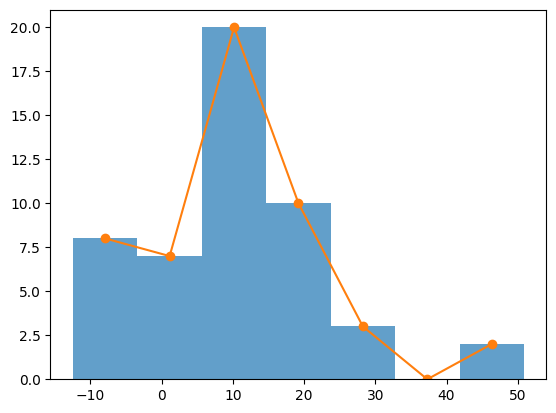

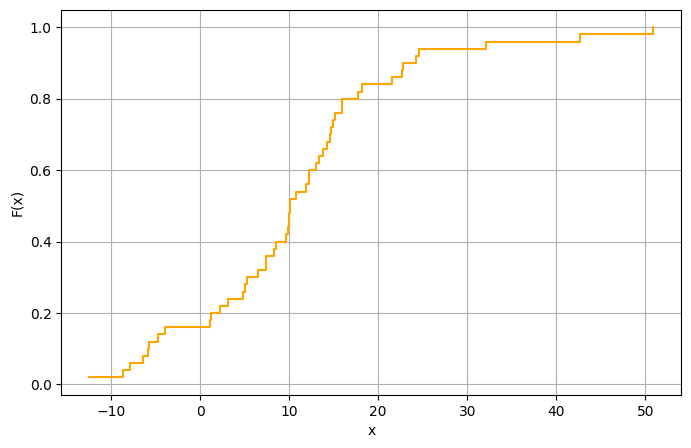

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.array(dataset)

intervals = 7
intervals = np.linspace(data.min(), data.max(), intervals + 1)


plt.hist(data, bins=intervals, alpha=0.7)


midpoint_list = [(intervals[i] + intervals[i + 1]) / 2 for i in range(len(intervals) - 1)]


freq, _ = np.histogram(data, bins=intervals)


plt.plot(midpoint_list, freq, 'o-')

plt.show()

datasort = np.sort(data)
n = len(datasort)
F = np.arange(1, n + 1) / n

plt.figure(figsize=(8, 5))
plt.step(datasort, F, where="post", color='orange')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid()
plt.show()


In [38]:
freq1 = freq.tolist()

intervals = [float(i) for i in intervals]
intervals = [(float(intervals[i]), float(intervals[i + 1])) for i in range(len(intervals) - 1)]


# Середины интервалов
midpoints = [(a + b) / 2 for a, b in intervals]
n = sum(freq)

# Математическое ожидание
mean_val = sum(f * x for f, x in zip(freq1, midpoints)) / n

# Дисперсия
variance_val = sum(f * (x - mean_val)**2 for f, x in zip(freq1, midpoints)) / (n - 1)

# Медиана
summ = [sum(freq1[:i+1]) for i in range(len(freq1))]
half_n = n / 2
median_index = next(i for i, s in enumerate(summ) if s >= half_n)
L = intervals[median_index][0]
F = summ[median_index - 1] if median_index > 0 else 0
f_med = freq1[median_index]
h = intervals[median_index][1] - intervals[median_index][0]
median_val = L + ((half_n - F) / f_med) * h

# Мода
modal_index = freq1.index(max(freq))
L_mod = intervals[modal_index][0]
f_mod = freq1[modal_index]
f_prev = freq1[modal_index - 1] if modal_index > 0 else 0
f_next = freq1[modal_index + 1] if modal_index < len(freq1) - 1 else 0
mode_val = L_mod + (f_mod - f_prev) / ((f_mod - f_prev) + (f_mod - f_next)) * h

print(f"Математическое ожидание: {mean_val}")
print(f"Дисперсия: {variance_val}")
print(f"Медиана: {median_val}")
print(f"Мода: {mode_val}")


Математическое ожидание: 10.360800000000001
Дисперсия: 155.07090546938778
Медиана: 10.180000000000003
Мода: 10.769565217391307
